<a href="https://colab.research.google.com/github/JuanZapa7a/Medical-Image-Processing/blob/main/Google_Notebook_and_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create a New Notebook in Colab

Within the Colab environment, it is easy to create a new notebook. Open Google Colab in a browser (if not already open). From the pop-up window, click `New notebook`. If already in the Colab environment, click `File` in the top-left menu under `Welcome to Colaboratory`. Click `New notebook` from the drop-down menu. A code cell is now ready for executing Python code! Add code or text cells by clicking the `+ Code` or `+ Text` button. For more options, click Insert from the main menu

For an introduction to Colab, peruse

   https://colab.research.google.com/

To create your first piece of code, add the following in the code cell:
```
10 * 5
```
To execute the code, click the `little arrow to the left`. The output from the code cell shows the result of the multiplication.

In [ ]:
10*5

50

# Import the TensorFlow Library

Before we can do anything in TensorFlow, we must import the appropriate Python library. It is common practice to alias the TensorFlow library as tf. So go ahead and execute the import in a new code cell:

In [1]:
import tensorflow as tf

# GPU Hardware Accelerator

To vastly speed up processing, use the GPU available from the Google Colab cloud service. Colab provides a free Tesla K80 GPU of about 12 GB RAM (as of this writing). It’s very easy to enable the GPU in a Colab notebook:
1. Click Runtime in the top-left menu.
2. Click Change runtime type from the drop-down menu.
3. Choose GPU from the Hardware accelerator drop-down menu.
4. Click Save.

---
**Note** the GPU must be enabled in each notebook. But it only has to be enabled once.

---

In [ ]:
tf.__version__, tf.test.gpu_device_name()

('2.15.0', '')

If ‘/device:GPU:0’ is displayed, the GPU is active. If ‘ ’ is displayed, the regular CPU is active.

---
**Tip** if you get the error NAME ‘TF’ IS NOT DEFINED, re-execute the code to import the tensorFlow library! For some reason, we sometimes have to re-execute the tensorFlow library import in Colab. we don’t know why this is the case.

---

Colab is a wonderful tool to work with TensorFlow. However, it does have its limitations. Colab applies dynamic resource provisioning. In order to be able to offer computational resources for free, Colab dynamically adjusts usage limits and hardware availability on the fly. So available resources in Colab vary over time to accommodate fluctuations in demand. In a nutshell, this means that Colab may not always be available for use! One solution is to move to Colab Pro for a small monthly fee. As of this writing, the cost is $9.99/month.

---
**Tip** For serious tensorFlow users, we recommend moving to Colab pro. it is not free, but it is quite inexpensive. From our experience, it is more powerful than the free version, and it is more readily available.

---


# Create a TensorFlow Dataset

Create a dataset of three tensors with six elements each:


In [ ]:
data = [[8, 5, 7, 3, 9, 1],
        [0, 3, 1, 8, 5, 7],
        [9, 9, 9, 0, 0, 7]]
dataset = tf.data.Dataset.from_tensor_slices(data)
dataset

<_TensorSliceDataset element_spec=TensorSpec(shape=(6,), dtype=tf.int32, name=None)>

Create the dataset. Transform it into a `tf.data.Dataset` object with the `from_tensor_slices()` method. The shape of the dataset is (6,), which means that each row contains six scalar values.

---
**Tip** we highly recommend testing small pieces of code in their own code cells to reduce debugging time and effort.

---

# Consume the Dataset
Iterate over the dataset to display tensor information:

In [ ]:
i= 0
it = iter(dataset)
print ('row ' + str(i), ':', end=' ')
print (next(it).numpy())
i += 1
print ('row ' + str(i), ':', end=' ')
print (next(it).numpy())
i += 1
print ('row ' + str(i), ':', end=' ')
print (next(it).numpy())

row 0 : [8 5 7 3 9 1]
row 1 : [0 3 1 8 5 7]
row 2 : [9 9 9 0 0 7]


Since the `tf.data.Dataset` object is created with `from_tensor_slices()`, it is a Python iterable that can be consumed with a for loop. With TensorFlow datasets, use the `numpy()` method to explicitly convert each tensor to a NumPy array.

Alternatively, we can use the `take()` method to iterate over a TensorFlow dataset:


In [ ]:
for i, e in enumerate(dataset.take(3)):
  print ('row ' + str(i), ':', end=' ')
  print (e.numpy())

row 0 : [8 5 7 3 9 1]
row 1 : [0 3 1 8 5 7]
row 2 : [9 9 9 0 0 7]


We add 3 as a parameter in the `take()` method to grab three examples. Another option is to create a Python iterator:

In [ ]:
i= 0
it = iter(dataset)
print ('row ' + str(i), ':', end=' ')
print (next(it).numpy())
i += 1
print ('row ' + str(i), ':', end=' ')
print (next(it).numpy())
i += 1
print ('row ' + str(i), ':', end=' ')
print (next(it).numpy())

row 0 : [8 5 7 3 9 1]
row 1 : [0 3 1 8 5 7]
row 2 : [9 9 9 0 0 7]


Initialize a counter variable. Use the `iter()` method to create an iterator. Consume the iterator with the `next()` method and display the results.

#Dataset Structure

The `element_spec` property of `tf.data.Dataset` allows inspection of the dataset. The propertyreturns a nested structure of the `tf.TypeSpec` object that matches the structure of the element. The nested structure may be a single component, a tuple of components, or a nested tuple of components

Inspect the dataset:

In [ ]:
dataset.element_spec

TensorSpec(shape=(6,), dtype=tf.int32, name=None)

Shape and datatype are displayed.
Alternatively, we can just display the `tf.data.Dataset` object:

In [ ]:
dataset

<_TensorSliceDataset element_spec=TensorSpec(shape=(6,), dtype=tf.int32, name=None)>

# Create a Dataset from Memory

If all of your input data fits in memory, the simplest way to create a TensorFlow dataset
is to convert it to `tf.Tensor` objects with the `from_tensor_slices()` method. Now, we are going to build a pipeline. We begin by loading a clean dataset. We continue by scaling the feature data images. Scaling (or feature scaling) is a method used to normalize the range of independent variables or features of a dataset. Scaling is important because
ML models tend to work better if the pixels that make up each image are smaller in size. We inspect the data with code and visualizations. Next, we configure the pipeline for performance. We end by creating a model, training the model, and evaluating the model.

## Buscar conjuntos de datos disponibles
Para obtener la lista de constructores disponibles, use `tf.keras.dataset.list_builders()` o consulte nuestro catálogo .

## Load and Inspect Data
To build an input pipeline, we need a dataset. Since the focus is on building a TensorFlow consumable pipeline, we work with cleansed datasets.
Load training and test data in memory:

In [ ]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

Download Fashion-MNIST data into training and test sets. We use training data to teach the model. We use test data to evaluate the model. Fashion-MNIST is a dataset of Zalondo’s article images. It contains 60,000 training and 10,000 test examples. The dataset is intended to serve as a direct drop-in replacement of the original MNIST dataset for benchmarking machine learning algorithms.

Inspect :

In [ ]:
type(train[0]), type(train[1])

(numpy.ndarray, numpy.ndarray)

**Training and test sets are tuples** where the first tuple element contains feature images and the second contains corresponding labels. **Both datasets (features and labels) are NumPy arrays**.

Load images and labels into variables:

In [ ]:
train_img, train_lbl = train
test_img, test_lbl = test

For example, [0] images , [4000] image, [12] row, [20] column is:

In [ ]:
print(train[0][4000][12][20])

187


In [ ]:
print(train_img[4000][12][20])

187


and the [1] label for [4000] image is:

In [ ]:
print(train[1][4000])

8


or

In [ ]:
print(train_lbl[4000])

8


By separating images and labels from the respective datasets, we can more easily process images and labels as needed.

Verify shapes:

In [ ]:
print ('train:', train_img.shape, train_lbl.shape)
print ('test:', test_img.shape, test_lbl.shape)

train: (60000, 28, 28) (60000,)
test: (10000, 28, 28) (10000,)


Training data consists of 60,000 28 × 28 feature images and 60,000 labels. Test data consists of 10,000 28 × 28 feature images and 10,000 labels.
# Scale and Create the tf.data.Dataset
Scale data for efficient processing and create the training (train_ds) and test (test_ds) sets:

In [ ]:
train_image = train_img / 255.0
test_image = test_img / 255.0
train_ds = tf.data.Dataset.from_tensor_slices(
    (train_image, train_lbl))
test_ds = tf.data.Dataset.from_tensor_slices(
    (test_image, test_lbl))

Get slices of the NumPy arrays in the form of `tf.data.Dataset()` objects with `from_tensor_slices()`. Feature image pixel values are typically integers that range from 0 to 255. To scale, divide feature images by 255 to get pixel values that range from 0 to 1.

Scaling images is a critical preprocessing step because deep learning models train faster on smaller images. Moreover, many deep learning model architectures require that images are the same size. But raw images tend to vary in size.

Inspect training and test tensors:

In [ ]:
train_ds, test_ds

(<_TensorSliceDataset element_spec=(TensorSpec(shape=(28, 28), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>,
 <_TensorSliceDataset element_spec=(TensorSpec(shape=(28, 28), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>)

Both datasets are `TensorSliceDataset` objects, which means that they are iterators. An **iterator** is an object that contains a countable number of examples that can be traversed with the `next()` method.

Display the **first label** from the training set:

In [ ]:
next(train_ds.as_numpy_iterator())[1]

9

Each example in the training set contains an image matrix and its corresponding label. The `next()` method returns a tuple with the first image matrix and its label in positions 0 and 1 in the tuple respectively.

Display **ten labels** from the training set:

In [ ]:
next(train_ds.batch(10).as_numpy_iterator())[1]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

The `batch()` method takes n examples from a dataset. Display all 60,000 labels from the training set:

In [ ]:
labels = next(train_ds.batch(60_000).as_numpy_iterator())[1]
labels, len(labels)

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8), 60000)

Display the first image from the training set:

In [ ]:
next(train_ds.as_numpy_iterator())[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Verify that the first image is a 28 × 28 matrix:

In [ ]:
arrays = len(next(train_ds.as_numpy_iterator())[0])
pixels = len(next(train_ds.as_numpy_iterator())[0][0])
arrays, pixels

(28, 28)

or

In [ ]:
next(train_ds.take(1).as_numpy_iterator())[0].shape

(28, 28)



To find dimensions of a matrix (tensor) in Python, the height (or rows) is `len(matrix)`, and the width (or columns) is `len(matrix[0])`.

## Verify Scaling
Display a pre-scaled tensor from the training set:


In [ ]:
train_img[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  88, 221, 215, 217, 219, 211, 185, 150, 118,
        107,  99,  88,  83,  90, 135, 212, 203, 207, 219, 169,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  27, 118, 162,  40,   0,   0,   0,  10,
         19,  28,  39,  47,  36,   0,   0, 203, 230, 220, 203,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 138, 136,  71,  69,  54, 216, 217, 203, 184,
        168, 163, 162, 163, 178, 221, 186,  38,  26,   7,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  67, 134, 154, 224, 129,  66,  81, 117, 129,
        128, 132, 137, 131, 129,  86,  73, 157, 151, 134, 216,  18,   0,
          0,   0],
       [  0,   0,   0,   0, 203, 198, 172, 183, 206, 255, 255, 250, 243,
        240, 239, 235, 238, 244, 255, 238, 184, 160,  86,  98,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 122, 188, 224, 151, 105, 127,  97, 100, 105,
        114, 117, 117, 113, 103,  98, 111, 142, 254, 191, 255,  49,   0,
          0,   0],
       [  0,   0,   0,   0, 163, 179, 200,  95, 154, 198, 197, 200, 200,
        198, 197, 198, 199, 202, 200, 176,  86, 206, 157, 162,  10,   0,
          0,   0],
       [  0,   0,   0,   0, 197, 201, 229,  71, 144, 194, 181, 183, 179,
        182, 180, 179, 180, 190, 185, 197,  76, 219, 185, 201,  34,   0,
          0,   0],
       [  0,   0,   0,   0, 199, 193, 226,  58, 154, 192, 184, 187, 184,
        186, 184, 185, 183, 192, 191, 200,  56, 219, 203, 207,  60,   0,
          0,   0],
       [  0,   0,   0,   0, 201, 194, 224,  41, 163, 190, 186, 186, 184,
        185, 183, 185, 178, 190, 194, 202,  33, 211, 200, 206,  73,   0,
          0,   0],
       [  0,   0,   0,   0, 201, 197, 222,  17, 172, 190, 186, 187, 182,
        186, 185, 187, 180, 187, 193, 202,  26, 212, 202, 203,  76,   0,
          0,   0],
       [  0,   0,   0,   0, 200, 197, 223,   0, 177, 189, 184, 185, 178,
        184, 183, 184, 180, 183, 189, 203,  35, 196, 203, 203,  84,   0,
          0,   0],
       [  0,   0,   0,   0, 200, 197, 223,   0, 185, 187, 185, 187, 180,
        184, 182, 183, 178, 182, 183, 205,  44, 159, 207, 201,  85,   0,
          0,   0],
       [  0,   0,   0,   0, 187, 198, 225,   0, 194, 188, 184, 185, 180,
        183, 183, 184, 181, 181, 177, 206,  46, 129, 211, 200,  88,   0,
          0,   0],
       [  0,   0,   0,   6, 186, 200, 211,   0, 199, 189, 184, 184, 185,
        182, 183, 184, 185, 182, 175, 205,  50,  97, 216, 197,  93,   0,
          0,   0],
       [  0,   0,   0,   5, 185, 204, 184,   0, 202, 188, 182, 182, 183,
        183, 184, 182, 180, 182, 174, 202,  63,  59, 220, 196,  94,   0,
          0,   0],
       [  0,   0,   0,   5, 184, 206, 157,   0, 204, 187, 187, 189, 192,
        190, 190, 191, 190, 187, 183, 202,  78,  35, 222, 197,  95,   0,
          0,   0],
       [  0,   0,   0,   5, 183, 208, 127,   0, 197, 166, 153, 149, 149,
        146, 148, 149, 150, 151, 158, 191,  90,   8, 223, 195,  99,   0,
          0,   0],
       [  0,   0,   0,   6, 184, 208, 11

Display fifth image

Display the same tensor after scaling:

In [ ]:
train_image[5]

array([[0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.08627451,
        0.34509804, 0.7372549 , 0.6745098 , 0.51764706, 0.49019608,
        0.55294118, 0.78039216, 0.56078431, 0.03529412, 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.07843137, 0.51372549, 0.78039216, 0.80784314,
        0.76862745, 0.79215686, 0.94901961, 1.        , 1.        ,
        0.98039216, 0.87058824, 0.77254902, 0.80784314, 0.7372549 ,
        0.49411765, 0.06666667, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.1372549 , 0.83921569, 0.74901961, 0.71764706, 0.69803922,
        0.68627451, 0.65882353, 0.58823529, 0.63529412, 0.62352941,
        0.59607843, 0.6196

or:

In [ ]:
next(train_ds.take(5).as_numpy_iterator())[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Voilà! The pixels are scaled between 0 and 1.

## Check Tensor Shape
Check shapes:

In [ ]:
for img, lbl in train_ds.take(5):
  print ('image shape:', img.shape, end=' ')
  print ('label:', lbl.numpy())

image shape: (28, 28) label: 9
image shape: (28, 28) label: 0
image shape: (28, 28) label: 0
image shape: (28, 28) label: 3
image shape: (28, 28) label: 0


Fashion-MNIST images are equally sized. So we don’t have to resize them!
## Inspect Tensors
Check train and test tensors:


In [ ]:
train_ds, test_ds

(<_TensorSliceDataset element_spec=(TensorSpec(shape=(28, 28), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>,
 <_TensorSliceDataset element_spec=(TensorSpec(shape=(28, 28), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>)

All is well.

## Preserve the Shape
Assign a variable to the feature image shape for use in the model:

In [ ]:
for img, label in train_ds.take(1):
  img.numpy().shape
img_shape = img.numpy().shape
img_shape

(28, 28)

## Visualize
Visualize an element from the training set:


label= 9


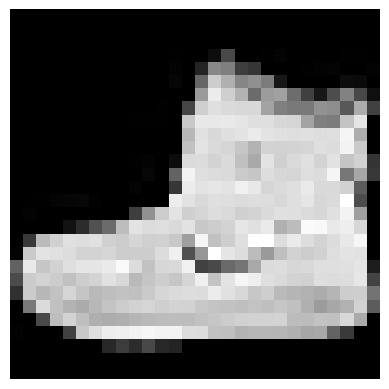

In [ ]:
import matplotlib.pyplot as plt

for img, label in train_ds.take(1):
  plt.imshow(img.numpy(), cmap='gray')
plt.axis('off')
plt.grid(False)
print('label=',label.numpy())

or:

label= tf.Tensor(9, shape=(), dtype=uint8)


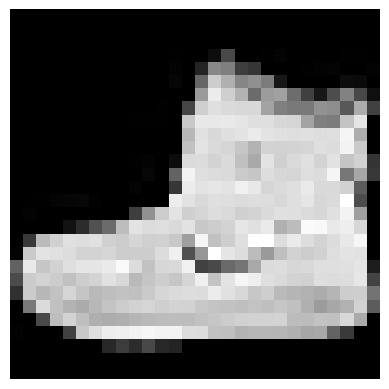

In [ ]:
import matplotlib.pyplot as plt

for img, label in train_ds.take(1):
  plt.imshow(img, cmap='gray')
plt.axis('off')
plt.grid(False)
print('label=',label)


Although Fashion-MNIST images are grayscale and NOT BIOMEDICALS, we can bring them to life with colors using predefined color maps built into the matplotlib library. A **color map** is an array of colors used to map pixel data to actual color values.

Peruse the following URL for detailed information about matplotlib color maps:
   https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

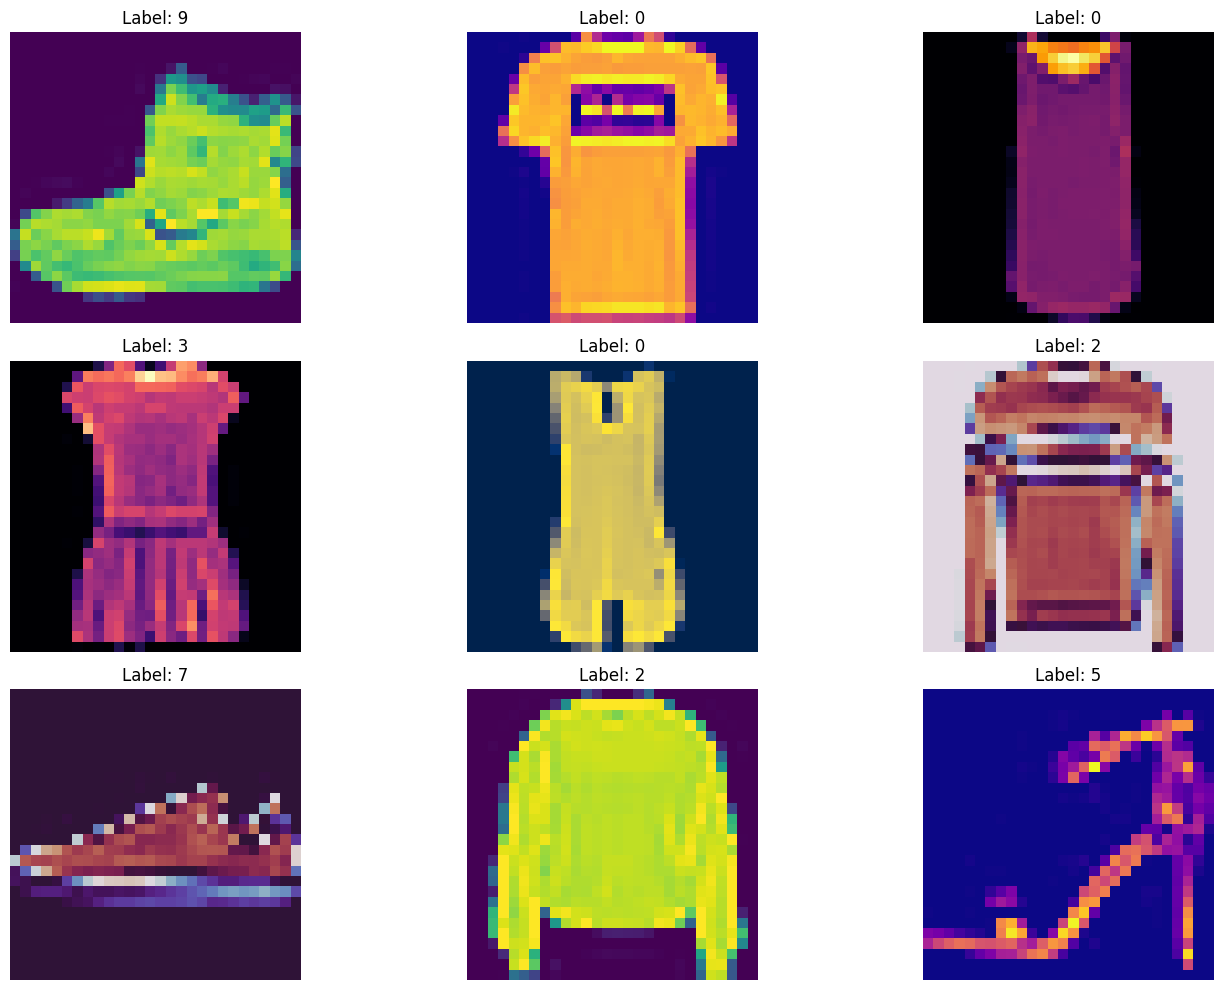

In [ ]:
# Display the first 9 images with different colormaps
cmaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'twilight', 'twilight_shifted']
plt.figure(figsize=(15, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy(), cmap=cmaps[i % len(cmaps)])
    plt.title(f'Label: {label}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Define Class Labels
From our experience working with [Fashion-MNIST](https://keras.io/api/datasets/fashion_mnist/), we know the corresponding labels:

In [ ]:
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
                'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag',
                'Ankle boot']

## Convert a Numerical Label to a Class Label
Labels are numerical in the `tf.data.Dataset` that we just loaded, but we can display the corresponding class name with the `class_labels` list we just created:

In [ ]:
for _, label in train_ds.take(1):
  print ('numerical label:', label.numpy())
  print ('string label:', class_labels[label.numpy()])

numerical label: 9
string label: Ankle boot


Take an example and display the label as a numerical value and string value.

## Create a Plot of Examples from the Dataset
Take some images and labels from the training set:


Create a function to display a grid of examples as shown

In [ ]:
def display_grid(feature, target, n_rows, n_cols, cl):
  plt.figure(figsize=(n_cols * 1.5, n_rows * 1.5))
  for row in range(n_rows):
    for col in range(n_cols):
      index = n_cols * row + col
      plt.subplot(n_rows, n_cols, index + 1)
      plt.imshow(feature[index], cmap='twilight',
                 interpolation='nearest')
      plt.axis('off')
      plt.title(cl[target[index]], fontsize=12)
  plt.subplots_adjust(wspace=0.2, hspace=0.5)


Invoke the function. `tf.squeeze` removes dimensions of size 1 from the shape of a tensor.



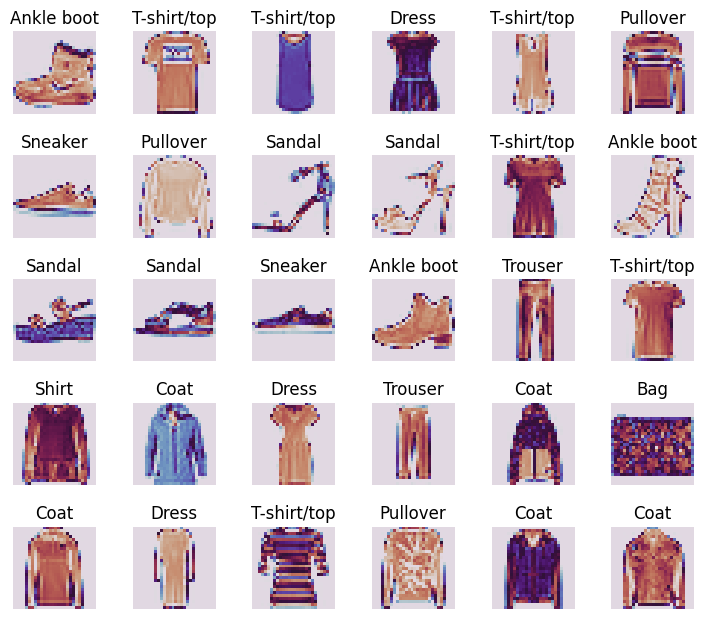

In [ ]:
rows, cols = 5, 6
num = rows*cols
images, labels = [], []
for feature, label in train_ds.take(num):
  images.append(tf.squeeze(feature.numpy()))
  labels.append(label.numpy())
display_grid(images, labels, rows, cols, class_labels)

It’s always a good idea to check out the dataset to see if it is as we expect.
## Build the Consumable Input Pipeline
We say consumable `input pipeline because the actual pipeline starts when data is actually acquired. We use this terminology to emphasize the importance of transforming the training and test datasets into efficient tensors for TensorFlow model consumption.

We see examples that refer to this part as building the input pipeline, but the input pipeline encompasses the entire workflow from raw data to generalized model. In later chapters, we drop the word “consumable.”

## Configure the Dataset for Performance
Use buffered prefetching and caching to improve I/O performance. Shuffle data to improve model performance.

**Prefetching** is a function in the tf.data API that overlaps data preprocessing and model execution while training, which reduces the overall training time of a model. To perform this operation, add the `tf.Dataset.prefetch` transformation to the input pipeline.

Add the `tf.data.Dataset.cache` transformation to the pipeline to **keep images in memory** after they’re loaded off disk during the first epoch, which ensures that the dataset doesn’t become a bottleneck during training. So caching saves operations (e.g., file opening, data reading) from being executed during each epoch.

**Shuffling** data serves the purpses of reducing variance (ensuring that a model remains general) and reducing overfitting. An obvious case for shuffling is when data is sorted by class (or target). We shuffle to ensure that the training, test, and validation sets are representative of the overall distribution of the data. To perform this operation, add the `tf.Dataset.shuffle` transformation to the pipeline.

Training is always performed on batches of training data and labels. Doing so helps the algorithm converge. **Batch** is when all of a dataset is used to compute the gradient during one iteration. **Mini-batch** is when a subset of a dataset is used to compute mthe gradient during one iteration. To perform this operation, add the `tf.Dataset.batch` transformation to the pipeline.

The *batch dimension* is typically the first dimension of data tensors. So a tensor of shape [100, 192, 192, 3] contains 100 images of 192 × 192 pixels with three values per pixel (RGB) in each batch. The **RGB color model** is an additive color model in which red, green, and blue lights are added together in various ways to reproduce a broad array of colors.

Build the consumable input pipeline:


In [ ]:
BATCH_SIZE = 128
SHUFFLE_SIZE = 5000

train_f = train_ds.shuffle(SHUFFLE_SIZE).batch(BATCH_SIZE)
train_fm = train_f.cache().prefetch(1)
test_f = test_ds.batch(BATCH_SIZE)
test_fm = test_f.cache().prefetch(1)

*Shuffle training data*. Shuffling randomizes training data, which ensures that each data element is independent from other data elements during each training epoch. Learning models tend to perform best when exposed to independently sampled data.

*Batch, cache, and prefetch training and test data*. Adding the `cache() transformation increases performance because data is read and written only once during the first epoch rather than during every epoch. Adding the prefetch(1) transformation is a good idea because it adds efficiency to the batching process. That is, while our training algorithm is working on one batch, TensorFlow is working on the dataset in parallel to get the next batch ready. So this transformation can dramatically improve training performance.

Like other `tf.data.Dataset` methods, prefetch operates on the elements of the input dataset. It has no concept of examples vs. batches. So prefetch two examples with examples.prefetch(2) and prefetch two batches with 20 examples per batch with examples.batch(20).prefetch(2).

The test (or validation) set is used to demonstrate how well the trained model works on examples it hasn’t seen during training. So it being shuffled is irrelevant`

We set batch size and shuffle size based on trial and error experiments. You can experiment by adjusting batch and shuffle sizes.

Inspect tensors:


In [ ]:
train_fm, test_fm
print('train batches =',len(train_fm))
print(60000/128)
print('test batches =',len(test_fm))
print(10000/128)

train batches = 469
468.75
test batches = 79
78.125


We can display one image from one batch

(128, 28, 28)
[2 6 1 3 5 6 9 0 5 7 7 3 1 7 0 7 5 4 4 6 5 5 5 6 4 8 0 2 2 3 7 0 7 2 8 1 2
 3 3 6 9 8 5 1 1 2 3 3 1 7 7 1 1 9 0 6 8 0 3 1 9 0 7 6 6 3 9 6 1 9 1 5 7 1
 5 3 6 2 3 9 0 4 0 7 0 2 9 2 9 0 3 9 1 5 9 3 4 9 4 9 5 3 3 3 6 6 1 7 6 6 2
 0 6 4 9 9 5 9 2 8 3 8 3 0 8 9 0 7]


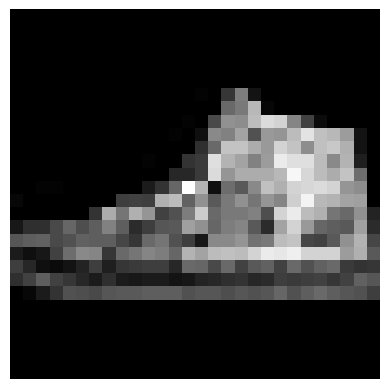

In [ ]:
for img, label in train_fm.take(1):
  print(img.numpy().shape)
  print(label.numpy())
  plt.imshow(img[127,:,:], cmap='gray')
plt.axis('off')
plt.grid(False)

Or all one batch, for example the batch number 469

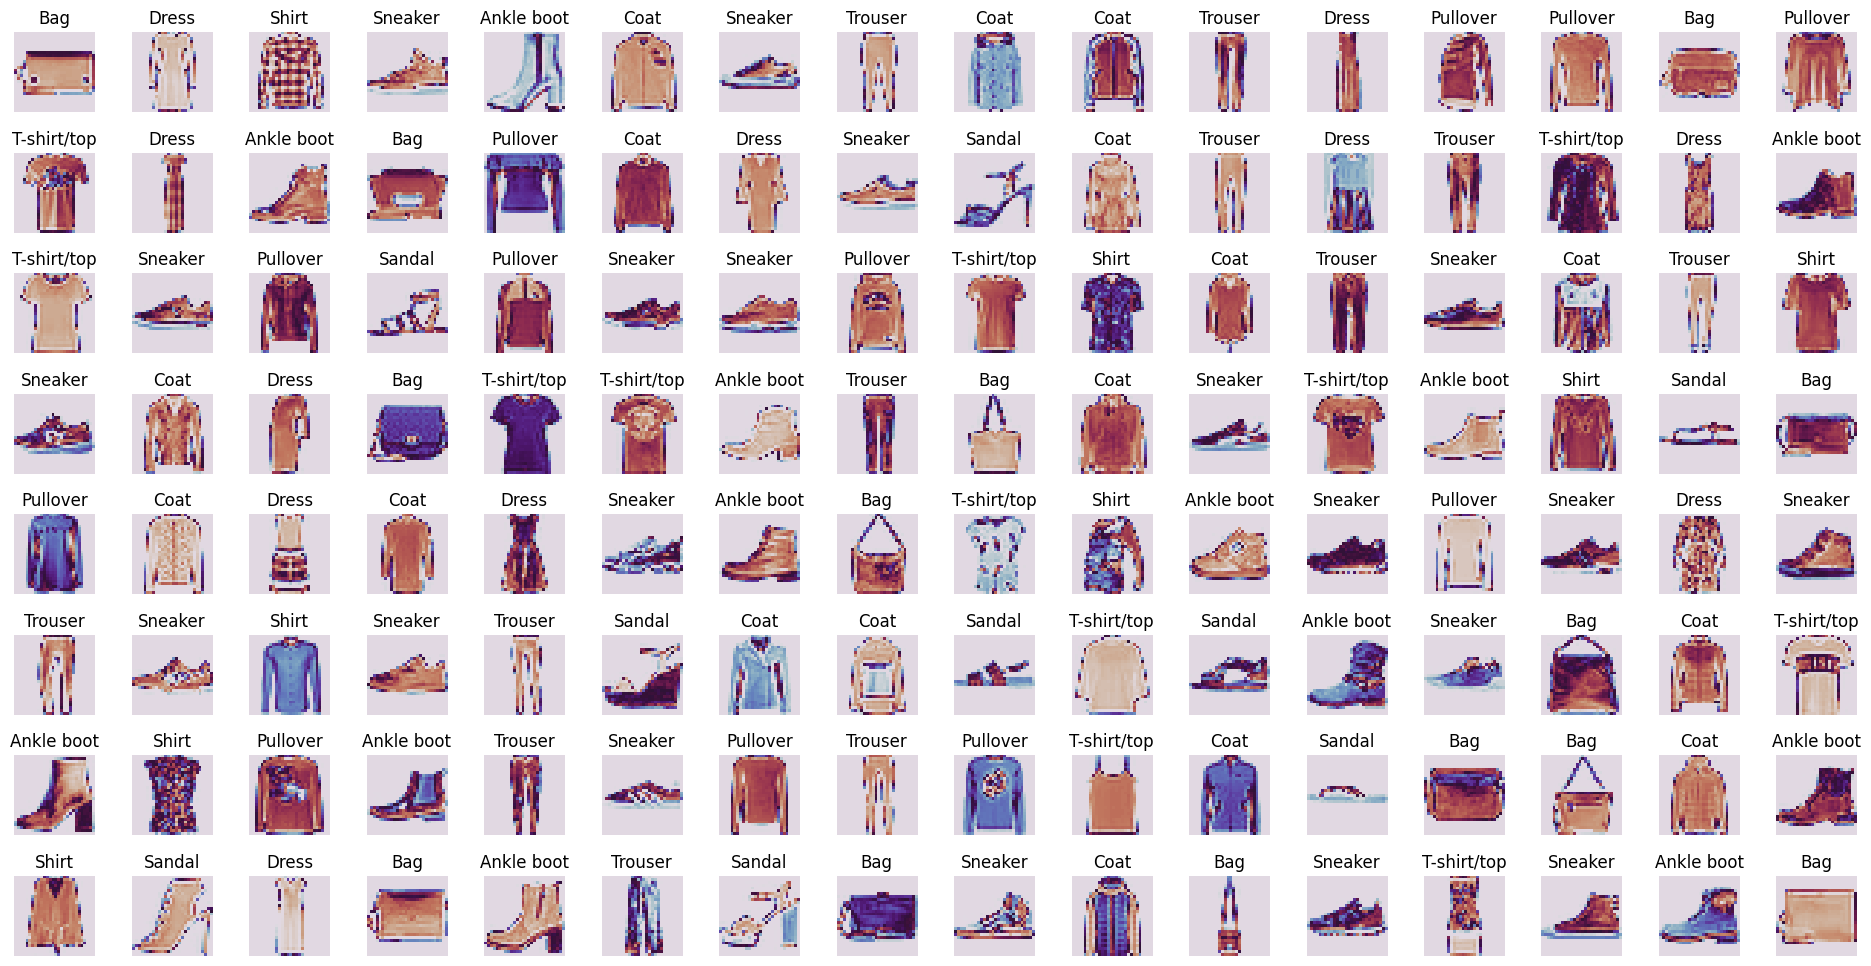

In [ ]:
rows, cols = 8, 16
num = rows*cols
for images, labels in train_fm.take(3):
  i=0
display_grid(images, labels, rows, cols, class_labels)

## Build the Model
Import requisite libraries:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import numpy as np

Clear previous models and generate a seed for reproducibility of results:

In [ ]:
tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

We use zero for the seed value, but any number can be substituted.

---
**Tip** Clearing previous models does not reset the current model to its initial state. to reset a model, just rebuild the input pipeline for the model!

---

Create the [sequential model](https://keras.io/guides/sequential_model/):

In [ ]:
model_1 = Sequential([
  Flatten(input_shape=img_shape),
  Dense(128, activation='relu'),
  Dropout(0.4),
  Dense(10, activation=None)
])

or

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=img_shape))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation=None))

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand. Most of deep learning consists of chaining together simple layers. Most layers, such as *Dense*, have parameters that are learned during training.

The first layer in this network is a *Flatten* layer, which transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array
(of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn because it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two Dense layers. Dense layers are fully connected neural layers, which means that all the neurons in a layer are connected to all neurons in the next layer.

The first Dense layer has 128 nodes (or neurons). We add a *Dropout* layer after the first Dense layer to reduce overfitting. The second (and last) layer returns a logits array with length of 10. **Logits** are the outputs of a layer of neurons before the activation function is applied. Each node contains a score that indicates that the current image belongs to one of the ten classes.

**Dropout** is a regularization method that approximates training a large number
of neural networks with different architectures in parallel. During training, some number of layer outputs are randomly ignored or “dropped out,” which has the effect of making the layer look like and be treated like a layer with a different number of nodes

and connectivity to the prior layer. In effect, each update to a layer during training is performed with a different “view” of the configured layer.

Inspect the model:

In [ ]:
model_1.summary()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param

## Compile and Train the Model
Compile the model with `SparseCategoricalCrossentropy` loss. Sparse categorical cross- entropy performs well when classes are mutually exclusive. That is, each sample belongs exactly to one class. An advantage of using sparse categorical cross-entropy is that it saves time in memory as well as computation because it uses a single integer for a class rather than a whole vector.

The *from_logits=True* attribute informs the loss function that the output values generated by the model are not normalized. That is, the softmax function has not been applied on them to produce a probability distribution

Compile:

In [ ]:
model.compile(optimizer='adam',
  loss=SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

Train the model:


In [ ]:
epochs = 10
history = model.fit(train_fm, epochs=epochs,
                    verbose=1, validation_data=test_fm)

Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 0.6527 - accuracy: 0.7749 - val_loss: 0.4678 - val_accuracy: 0.8316
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4643 - accuracy: 0.8348 - val_loss: 0.4200 - val_accuracy: 0.8495
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.4212 - accuracy: 0.8495 - val_loss: 0.4023 - val_accuracy: 0.8500
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3941 - accuracy: 0.8595 - val_loss: 0.3920 - val_accuracy: 0.8587
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3805 - accuracy: 0.8629 - val_loss: 0.3758 - val_accuracy: 0.8632
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3673 - accuracy: 0.8680 - val_loss: 0.3684 - val_accuracy: 0.8669
Epoch 7/10
469/469 [==============================] - 3s 5ms/step - loss: 0.3579 - accuracy: 0.8705 - val_loss: 0.3657 - val_accuracy: 0.8698
Epoch 

The model is training with ten epochs. The number of epochs is the number of times the learning algorithm works through the entire training dataset. Loss and accuracy are displayed for training and test data. Training loss and accuracy are based on what the model learned during training. Test loss and accuracy are based on new data that the model hasn’t learned upon. So the closer test accuracy is to training accuracy, the more generalizable the model. Of course, we want to have high test accuracy and low test loss.

To visualize the training history with matplotlib, you can access the training and validation data stored in the history object returned by the `fit()` method in Keras. The history object contains the loss and metric values for each epoch of training.

Here's how you can visualize the training and validation loss and accuracy on separate plots using matplotlib:

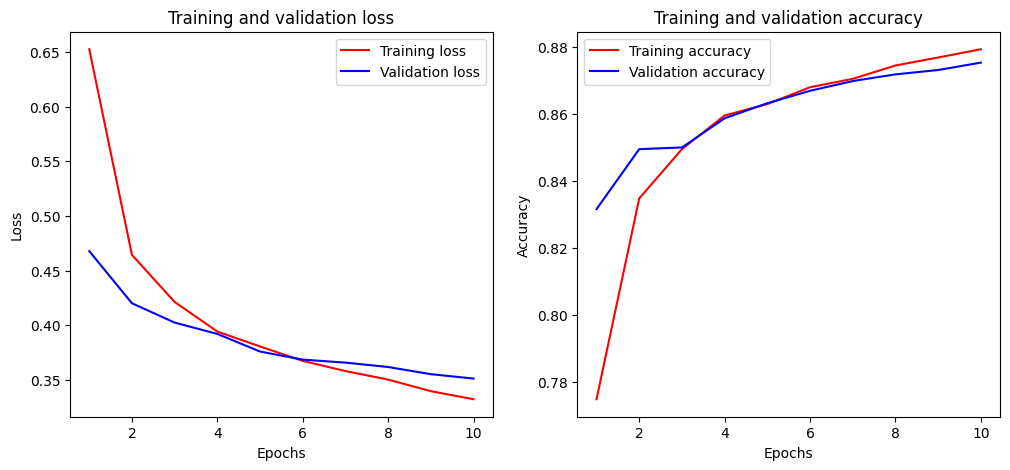

In [ ]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot the loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In this code:

The loss and accuracy values for both training and validation are extracted from the history object.
These values are used to plot the loss and accuracy curves for both training and validation on separate plots.
`plt.subplot()` is used to organize the plots into a single figure.
These plots allow you to visualize how the loss and accuracy change over epochs for both the training and validation sets. This can help you evaluate the performance and generalization of your model during training.

To validate the model with the test set and visualize its performance, you can use the `evaluate()` method in Keras to compute the loss and metrics on the test data. Then, you can plot the results using matplotlib.

This code snippet will evaluate the trained model on the test set, print the test loss and accuracy, and then plot them using a bar plot. The red bar represents the test loss, and the blue bar represents the test accuracy. This visualization provides a quick overview of the model's performance on the test data.

Test Loss: 0.3510836958885193
Test Accuracy: 0.8752999901771545


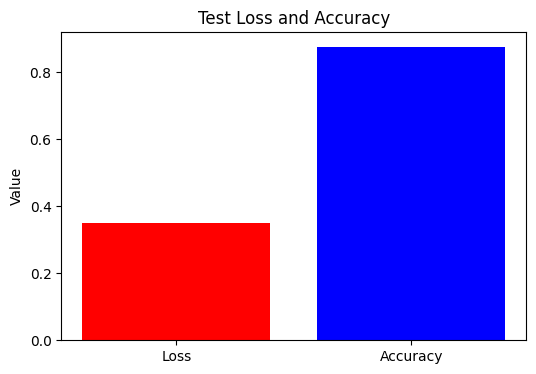

In [ ]:
import matplotlib.pyplot as plt

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_fm, verbose=0)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Plot the test data
plt.figure(figsize=(6, 4))
plt.bar(['Loss', 'Accuracy'], [test_loss, test_accuracy], color=['red', 'blue'])
plt.title('Test Loss and Accuracy')
plt.ylabel('Value')
plt.show()


A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. The matrix compares the actual target values with the values predicted by the model.

Each row of the confusion matrix represents the instances in an actual class, while each column represents the instances in a predicted class. The diagonal elements of the matrix represent the instances that were correctly classified, while off-diagonal elements represent misclassifications.

Here's how you can generate a confusion matrix using scikit-learn:

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np



# Generate confusion matrix


#print("Confusion Matrix:")
#print(conf_matrix)


# Load a TensorFlow Dataset as NumPy
The previous section modeled Fashion-MNIST data based on a ***Keras dataset***. However, we can load data as a ***TensorFlow dataset (TFDS)*** and convert it into NumPy arrays for very easy processing. We cover TFDS in detail in a later chapter.

For this experiment, we load the MNIST dataset instead of Fashion-MNIST. We do this because we work with Fashion-MNIST many times in later chapters. So we just want to expose you to another dataset for practice. Once the data is loaded and converted to NumPy, the input pipeline phases are the same as in the previous section.

Create a training set as NumPy arrays in a single batch:

In [2]:
import tensorflow_datasets as tfds
image_train, label_train = tfds.as_numpy(
    tfds.load(
        'colorectal_histology', split='train',
        batch_size=-1, as_supervised=True,
        try_gcs=True))
type(image_train), image_train.shape

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/5000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/colorectal_histology/2.0.0.incompleteD4VJ25/colorectal_histology-train.tfr…

Dataset colorectal_histology downloaded and prepared to /root/tensorflow_datasets/colorectal_histology/2.0.0. Subsequent calls will reuse this data.


(numpy.ndarray, (5000, 150, 150, 3))

By using *batch_size=-1*, the full dataset is loaded as a single batch. The *tfds.load()* function loads the dataset. The *tfds.as_numpy()* function converts the dataset to NumPy arrays.

The training set contains 5000 150 × 150 images. The *3* dimension indicates that the data is color. A **grayscale** image is one in which the only colors are shades of gray. That is, the image only contains luminance (or brightness) information and no color information.

The 'colorectal_histology' dataset has only a training split and does not have a separate split for testing.

Create the corresponding test set:

``` python
image_test, label_test = tfds.as_numpy(
    tfds.load(
        'mnist', split='test',
        batch_size=-1, as_supervised=True,
        try_gcs=True))
type(image_test), image_test.shape
```
But this code give error because split is not a automatic set in this dataset. We need manually split the dataset.

In [22]:
import tensorflow_datasets as tfds
import numpy as np
from sklearn.model_selection import train_test_split

# Load the dataset
dataset, info = tfds.load('colorectal_histology', split='train', with_info=True)

# to numpy data
data = tfds.as_numpy(dataset)

# Setting images and labels list
images = []
labels = []

for example in data:
    images.append(example['image'])
    labels.append(example['label'])

# list to numpy arrays
images = np.array(images)
labels = np.array(labels)

# split train in 80% train and 20% test
image_train, image_test, label_train, label_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Verify
print("Train Images Shape:", image_train.shape)
print("Test Images Shape:", image_test.shape)



Train Images Shape: (4000, 150, 150, 3)
Test Images Shape: (1000, 150, 150, 3)


## Inspect Shapes and Pixel Intensity
Get training shapes:

In [23]:
image_train.shape, label_train.shape

((4000, 150, 150, 3), (4000,))


Get test shapes:

In [24]:
image_test.shape, label_test.shape

((1000, 150, 150, 3), (1000,))

We can display an image with its label

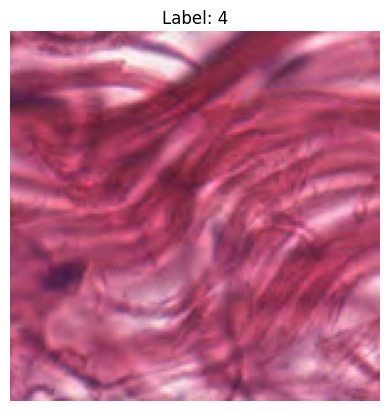

In [27]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the dataset
dataset = tfds.load('colorectal_histology', split='train')

# Take one example from the dataset
example = next(iter(dataset))

# Extract the image and label from the example
image, label = example['image'], example['label']

# Display the image
plt.imshow(image)
plt.title(f'Label: {label}')
plt.axis('off')
plt.show()

To get information about the classes in a dataset using TensorFlow Datasets (TFDS), you can load the dataset with with_info=True to access the dataset's metadata. Here’s how you can do it:

In [28]:
import tensorflow_datasets as tfds

# Cargar el conjunto de datos con información
dataset, info = tfds.load('colorectal_histology', split='train', with_info=True)

# Obtener las clases
classes = info.features['label'].names

# Mostrar las clases
print("Classes:", classes)


Classes: ['tumor', 'stroma', 'complex', 'lympho', 'debris', 'mucosa', 'adipose', 'empty']


To get information about the classes in a dataset using TensorFlow Datasets (TFDS), you can load the dataset with with_info=True to access the dataset's metadata. Here’s how you can do it:






Classes: ['tumor', 'stroma', 'complex', 'lympho', 'debris', 'mucosa', 'adipose', 'empty']


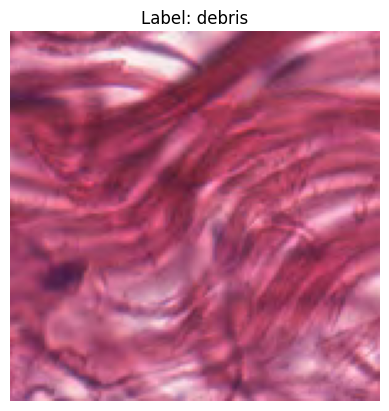

In [29]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the dataset with info
dataset, info = tfds.load('colorectal_histology', split='train', with_info=True)

# Get the class names
classes = info.features['label'].names

# Print the class names
print("Classes:", classes)

# Display an image from the dataset with its label
# Take one example from the dataset
example = next(iter(dataset))

# Extract the image and label from the example
image, label = example['image'], example['label']

# Show the image
plt.imshow(image)
plt.title(f'Label: {classes[label]}')
plt.axis('off')
plt.show()


To get one image and its corresponding class for each class in a dataset using TensorFlow Datasets (TFDS), you can iterate through the dataset and collect one example for each class. Here's how you can do it:
1. Loads the 'colorectal_histology' dataset along with its metadata.
2. Initializes a dictionary to store one example per class.
3. Iterates through the dataset, storing one image and its label for each class.
4. Once all classes have at least one example, it stops iterating.
5. Uses matplotlib to plot the images and display their labels.

Make sure to adjust the plotting layout according to the number of classes to avoid any layout issues. The `plt.subplot` call in this example assumes there are an even number of classes and lays them out in two rows. Adjust the number of rows and columns based on your dataset.




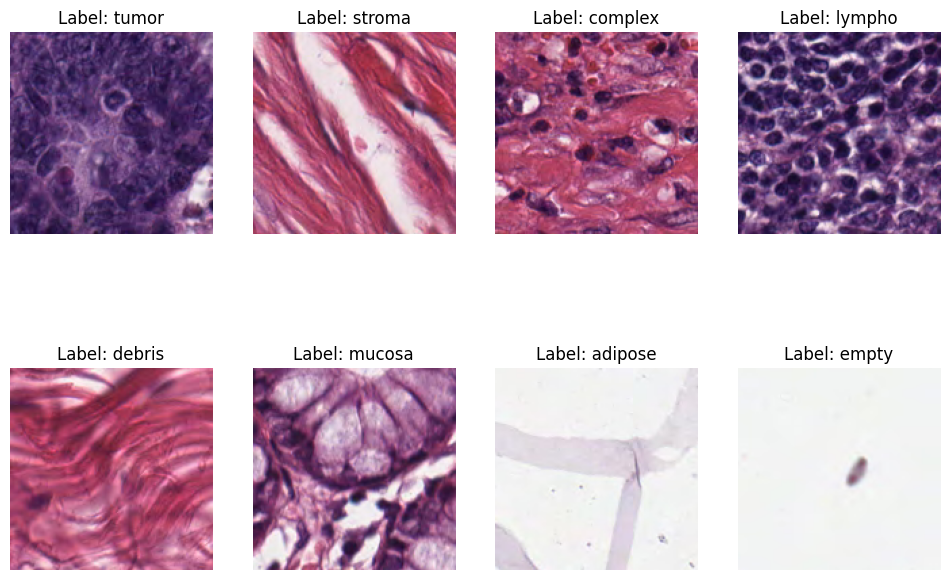

In [30]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the dataset with info
dataset, info = tfds.load('colorectal_histology', split='train', with_info=True)

# Get the class names
classes = info.features['label'].names

# Initialize a dictionary to store one example per class
class_examples = {class_name: None for class_name in classes}

# Iterate through the dataset and collect one example for each class
for example in dataset:
    image, label = example['image'], example['label'].numpy()
    class_name = classes[label]
    if class_examples[class_name] is None:
        class_examples[class_name] = (image, class_name)
    if all(class_examples.values()):
        break  # Stop once we have one example per class

# Plot the images with their labels
plt.figure(figsize=(12, 8))
for idx, (class_name, (image, label)) in enumerate(class_examples.items()):
    plt.subplot(2, len(classes) // 2, idx + 1)
    plt.imshow(image)
    plt.title(f'Label: {label}')
    plt.axis('off')
plt.show()


## Scale
Since NumPy array values are float, divide them by 255 to scale the image pixels:

In [31]:
train_sc = image_train / 255.0
test_sc = image_test / 255.0

Verify that scaling worked:

In [33]:
# Verify the scaling
print("Training data - min:", np.min(train_sc), "max:", np.max(train_sc))
print("Testing data - min:", np.min(test_sc), "max:", np.max(test_sc))

Training data - min: 0.0 max: 1.0
Testing data - min: 0.0 max: 1.0


This code will output the minimum and maximum values of the scaled training and testing data. If the scaling is correct, the minimum value should be 0.0 (or very close to it), and the maximum value should be 1.0 (or very close to it).

For a more detailed check, you can also inspect the values of a few specific pixels or entire images:

In [34]:
# Check a few pixels in the scaled training data
print("Sample pixel values from training data:")
print(train_sc[0, 0, 0])  # Pixel value of the first pixel in the first image
print(train_sc[0, 0, 1])  # Pixel value of the second pixel in the first image
print(train_sc[0, 0, 2])  # Pixel value of the third pixel in the first image

# Check a few pixels in the scaled testing data
print("Sample pixel values from testing data:")
print(test_sc[0, 0, 0])  # Pixel value of the first pixel in the first image
print(test_sc[0, 0, 1])  # Pixel value of the second pixel in the first image
print(test_sc[0, 0, 2])  # Pixel value of the third pixel in the first image


Sample pixel values from training data:
[0.54901961 0.20784314 0.37254902]
[0.49411765 0.19215686 0.36470588]
[0.49411765 0.19215686 0.36470588]
Sample pixel values from testing data:
[0.8        0.31764706 0.4627451 ]
[0.77254902 0.29019608 0.43529412]
[0.77254902 0.29019608 0.43529412]


## Prepare Data for TensorFlow Consumption
Slice NumPy arrays into TensorFlow datasets:


In [37]:
train_crht = tf.data.Dataset.from_tensor_slices(
    (image_train, label_train))
test_crht = tf.data.Dataset.from_tensor_slices(
    (image_test, label_test))

Inspect:

In [38]:
train_crht, test_crht

(<_TensorSliceDataset element_spec=(TensorSpec(shape=(150, 150, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 <_TensorSliceDataset element_spec=(TensorSpec(shape=(150, 150, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>)

## Build the Consumable Input Pipeline
Initialize parameters, shuffle training data, and batch and prefetch training and test data:

In [39]:
BATCH_SIZE = 100
SHUFFLE_SIZE = 10000
train_crhist = train_crht.shuffle(SHUFFLE_SIZE).\
                         batch(BATCH_SIZE).prefetch(1)
test_crhist = train_crht.batch(BATCH_SIZE).prefetch(1)

Inspect tensors:

In [40]:
train_crhist, test_crhist

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

## Build the Model
Earlier, we imported requisite libraries. Since they are already in memory, we don’t need to import them again (assuming that we are using the same notebook).

Get tensor shape:


In [41]:
np_shape = image_test.shape[1:]
np_shape

(150, 150, 3)

Clear previous models and generate a seed for reproducibility of results:

In [42]:
np.random.seed(0)
tf.random.set_seed(0)
tf.keras.backend.clear_session()

Create the model:

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([
  Flatten(input_shape=np_shape),
  Dense(512, activation='relu'),
  Dense(8, activation='softmax')
])


In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization

# Define the input shape
np_shape = train_sc.shape[1:]

# Improved model
model = Sequential([
    Flatten(input_shape=np_shape),
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(8, activation='softmax')  # Assuming 8 classes in the dataset
])


## Compile and Train the Model
Compile with sparse categorical cross-entropy. Notice that we **don't** set *from_logits=True* because we use *softmax* activation in the output layer of the model to produce a probability distribution from the logits. The **softmax** activation function acts on a vector to increase the difference between the largest component and all others and normalizes the vector to have a sum of 1 so that it can be interpreted as a vector of probabilities. It is used as the last step in classifiers:

In [56]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [57]:
# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 67500)             0         
                                                                 
 dense_7 (Dense)             (None, 1024)              69121024  
                                                                 
 batch_normalization_4 (Bat  (None, 1024)              4096      
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_5 (Bat  (None, 512)               2048      
 chNormalization)                                     

Train the model:

In [58]:
epochs = 100
history = model.fit(train_crhist, epochs=epochs, verbose=1,
                     validation_data=test_crhist)

Epoch 1/100
40/40 [==============================] - 7s 44ms/step - loss: 1.9693 - accuracy: 0.3240 - val_loss: 44.8710 - val_accuracy: 0.1233
Epoch 2/100
40/40 [==============================] - 2s 38ms/step - loss: 1.3828 - accuracy: 0.4423 - val_loss: 19.4012 - val_accuracy: 0.1270
Epoch 3/100
40/40 [==============================] - 1s 36ms/step - loss: 1.2567 - accuracy: 0.4717 - val_loss: 6.2168 - val_accuracy: 0.2535
Epoch 4/100
40/40 [==============================] - 2s 51ms/step - loss: 1.1320 - accuracy: 0.5128 - val_loss: 2.9064 - val_accuracy: 0.3590
Epoch 5/100
40/40 [==============================] - 2s 37ms/step - loss: 1.1015 - accuracy: 0.5268 - val_loss: 1.5194 - val_accuracy: 0.5082
Epoch 6/100
40/40 [==============================] - 2s 46ms/step - loss: 1.0689 - accuracy: 0.5415 - val_loss: 1.5422 - val_accuracy: 0.4725
Epoch 7/100
40/40 [==============================] - 2s 49ms/step - loss: 1.0229 - accuracy: 0.5555 - val_loss: 1.1403 - val_accuracy: 0.5485
Epoc

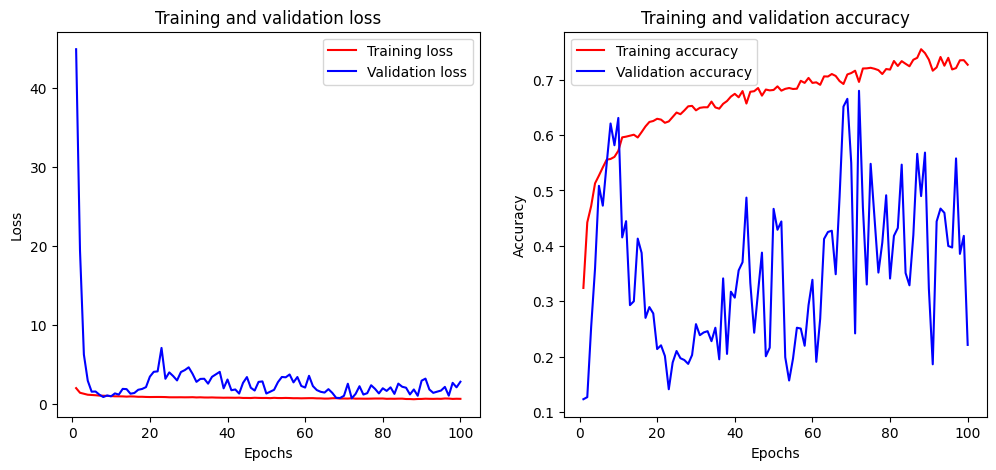

In [59]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot the loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [60]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the input shape
np_shape = train_sc.shape[1:]

# CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=np_shape),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(8, activation='softmax')  # Assuming 8 classes in the dataset
])

In [62]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [63]:
# Print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_8 (Bat  (None, 148, 148, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 dropout_8 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_9 (Bat  (None, 72, 72, 64)       

In [ ]:
epochs = 100
history = model.fit(train_crhist, epochs=epochs, verbose=1,
                     validation_data=test_crhist)